# K-Nearest Neighbors Algorithm in Python and Scikit-Learn
The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, it uses all of the data for training while classifying a new data point or instance. KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption e.g. linear-separability, uniform distribution, etc.

Below we will see how KNN can be implemented with Python's Scikit-Learn library. Before that we'll first explore the theory behind KNN and see what are some of the pros and cons of the algorithm.

## Theory
The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

Let's see this algorithm in action with the help of a simple example. Suppose you have a dataset with two variables, which when plotted, looks like the one in the following figure.

<img src="https://s3.amazonaws.com/stackabuse/media/k-nearest-neighbors-algorithm-python-scikit-learn-1.png">

Your task is to classify a new data point in 'X' with 'Blue' class or 'Red' Class. The coordinate vlaues of the data point are x = 45 and y = 50. Suppose the value of K is 3. The KNN algorithm starts by calculating the distance of point X. This is shown in the figure below. The three nearest points have been encircled.

<img src = "https://s3.amazonaws.com/stackabuse/media/k-nearest-neighbors-algorithm-python-scikit-learn-2.png">

The final step of the KNN algorithm is to assign a new point to the class to which majority of the three nearest points belong. From the figure above we can see that the two of the nearest points belong to the class "Red" while one belows to the class "Blue". Therefore the new data point will be classified as "Red"

## Pros and Cons of KNN
In this section we'll present some of the pros and cons of using the KNN algorithm. 

### Pros
1. It is extremely easy to implement
2. As said earlier, it is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, linear regression, etc.
3. Since the algorithm requires no training before making predictions, new data can be added seamlessly. 
4. There are only two parameters required to implement KNN, i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

### Cons
1. The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
2. The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
3. Finally, the KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

## Implementing KNN Algorithm with Scikit-Learn
In this section we will see how Python's Scikit-Learn library can be used to implement the KNN algorithm in less than 20 lines of code. 

#### The Dataset
We are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width, and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in teh dataset: iris-setoas, iris-versicolor, and iris-virginica.

#### Importing Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the Dataset
To import the dataset and load it into our pandas dataframe, we execute the following code:

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

To see what the dataset actually looks like, we run the following command:

In [9]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Preprocessing
The next step is to split our dataset into its attributes and lavels. To do so, use the following code:

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.

#### Train Test Split
To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

To create training and test splits, execute the following script:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

#### Feature Scaling
Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Wikipedia explains the reasoning pretty well:

*Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.*

The gradient descent algorithm (which is used in neural network training and other machine learning algorithms) also converges faster with normalized features.

The following script performs feature scaling:

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training and Predictions
It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

The final step is to make predictions on our test data. To do so, execute the following script:

In [14]:
y_pred = classifier.predict(X_test)

#### Evaluating the Algorithm
For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

      micro avg       0.93      0.93      0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



The results show that our KNN algorithm was able to classify all the 30 records in the test set with 100% accuracy, which is excellent. Although the algorithm performed very well with this dataset, don't expect the same results with all applications. As noted earlier, KNN doesn't always perform as well with high-dimensionality or categorical features.

#### Comparing Error Rate with the K Value
In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [16]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values. Execute the following script to create the plot:

Text(0,0.5,'Mean Error')

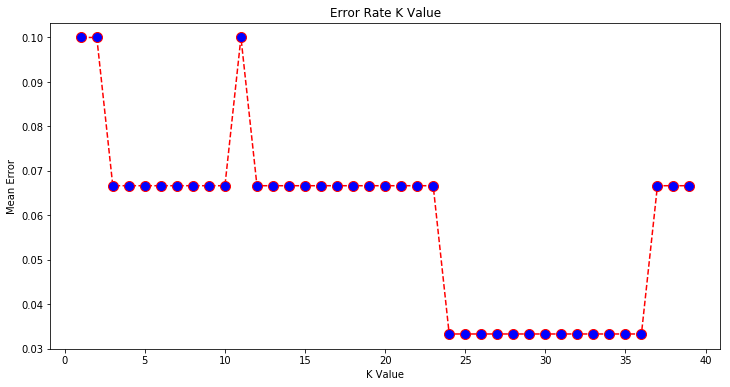

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### Conclusion
KNN is a simple yet powerful classification algorithm. It requires no training for making predictions, which is typically one of the most difficult parts of a machine learning algorithm. The KNN algorithm have been widely used to find document similarity and pattern recognition. It has also been employed for developing recommender systems and for dimensionality reduction and pre-processing steps for computer vision, particularly face recognition tasks.

***

# K-means Clustering Python Example
K-Means Clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.
The real world applications of K-Means include:
- customer profiling
- market segmentation
- computer vision
- search engines
- astronomy

## How it works
1. Select K (i.e 2) random points as cluster centers called centroids
<img src = "https://miro.medium.com/max/1400/1*EW-5MNBE3mxHS90KIBEAtQ.png">

2. Assign each data point to the closest cluster by calculating its distance with respect to each centroid
<img src = "https://miro.medium.com/max/1400/1*6jruJmmnxtSOj4cuwv91Hg.png">

3. Determine the new cluster center by computing the average of the assigned points 
<img src = "https://miro.medium.com/max/1400/1*blMy7iRv9R2ceDD2XILjbQ.png">

4. Repeat steps 2 and 3 until none of the cluster assignments change
<img src = "https://miro.medium.com/max/1400/1*GVQnG8FnP4L6jbHsO3oWOQ.png">

## Choosing the right number of clusters
Often times the data you'll be working with will have multiple dimensions making it difficult to visualize. As a consequence, the optimum number of clusters is no longer obvious. Fortunately, we have a way of determining this mathematically. 

We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method)

<img scr = "https://miro.medium.com/max/1400/1*vLTnh9xdgHvyC8WDNwcQQw.png">

WCSSS is defined as the sum of the squared distance between each member of the cluster and its centroid

$$WSS = \sum_{i = 1}^m (x_i - c_i)^2$$

For example, the computed WCSS for figure 1 would be greater than the WCSS calculated for figure 2:

<img src = "https://miro.medium.com/max/1400/1*0naSz4RFw_m5VqiRXo2SRw.png">

<img src = "https://miro.medium.com/max/2000/1*vNsFrDUvGn9yTjlnXLgW8A.png">

## Code
Let's take a look at how we could go about classifying data using the K-Means algorithm with python. As always, we need to start by importing the required libraries. 

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In this tutorial, we'll generate our own data using the make_blobs function from the sklearn.datasets module. The centers parameter specifies the number of clusters. 

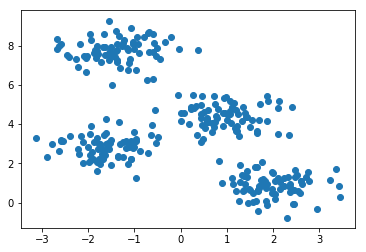

In [19]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

Even though we already know the optimal number of clusters, I figured we could still benefit from determining it using the elbow method. To get the values used in the graph, we train multiple models using a different number of clusters and storing the value of the intertia_ property (WCSS) every time.

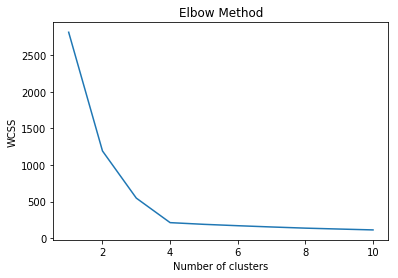

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Next, we’ll categorize the data using the optimum number of clusters (4) we determined in the last step. k-means++ ensures that you get don’t fall into the random initialization trap.

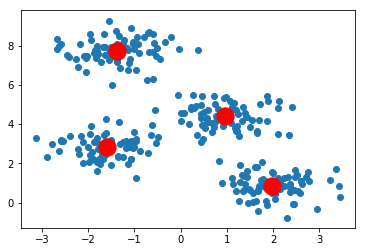

In [21]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

***

Now turning back to the Iris dataset to perfrom Elbow Plot using WCSS

In [34]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [35]:
iris = datasets.load_iris()

In [36]:
X = iris.data[:, :2]
y = iris.target

Text(0,0.5,'Sepal Width')

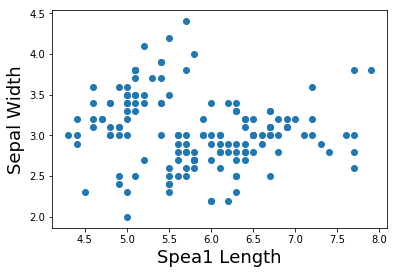

In [42]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

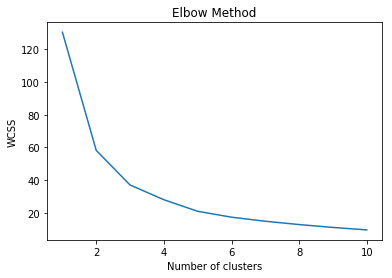

In [38]:
wcss = []

for i in range(1, 11):    
    km = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, n_jobs = 4, random_state=21)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

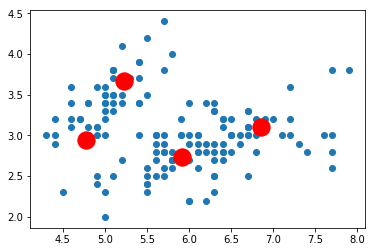

In [41]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, n_jobs = 4, random_state=21)
pred_y = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [39]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
    random_state=21, tol=0.0001, verbose=0)

In [31]:
centers = km.cluster_centers_
print(centers)

[[ 5.77358491  2.69245283]
 [ 5.006       3.428     ]
 [ 6.81276596  3.07446809]]
